In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
df = pd.read_csv('adult_salary.csv', index_col=False)


In [9]:
df = df.drop(columns=['Fnlwgt'])



In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Emp_type       48842 non-null  object
 2   Education      48842 non-null  object
 3   Education_num  48842 non-null  int64 
 4   Marital        48842 non-null  object
 5   Occupation     48842 non-null  object
 6   Relationship   48842 non-null  object
 7   Race           48842 non-null  object
 8   Sex            48842 non-null  object
 9   Capital_gain   48842 non-null  int64 
 10  Capital_loss   48842 non-null  int64 
 11  weekly_hours   48842 non-null  int64 
 12  Country        48842 non-null  object
 13  Income         48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [31]:
df.head()


,Age,Emp_type,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,weekly_hours,Country,Income
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0


In [12]:
df.isnull().sum()


Age              0
Emp_type         0
Education        0
Education_num    0
Marital          0
Occupation       0
Relationship     0
Race             0
Sex              0
Capital_gain     0
Capital_loss     0
weekly_hours     0
Country          0
Income           0
dtype: int64

In [30]:
df.describe(include='all')


,Age,Emp_type,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,weekly_hours,Country,Income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.870439,10.288420,10.078089,2.618750,6.577700,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.749355,0.811904
std,13.710510,1.464234,3.874492,2.570973,1.507703,4.230509,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,7.775343,0.972766
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,1.000000
max,90.000000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,3.000000


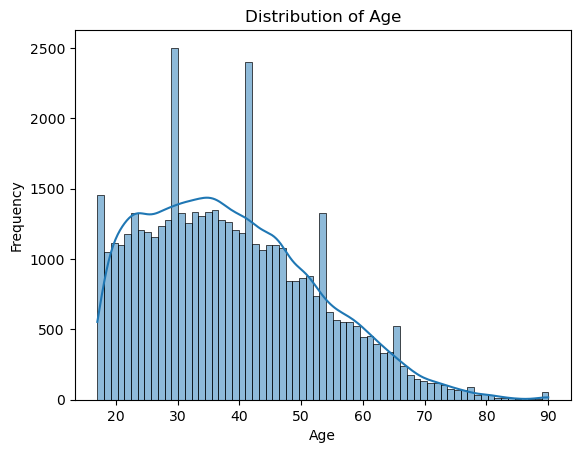

In [14]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


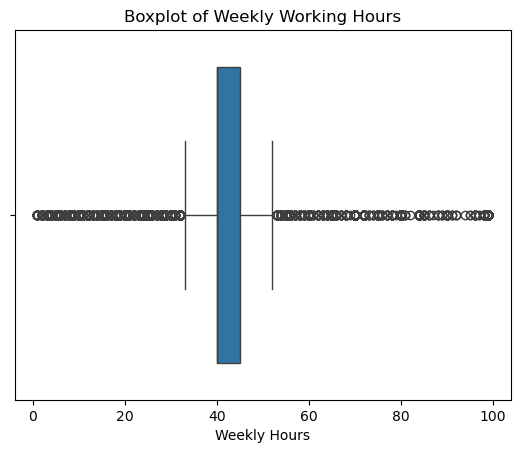

In [15]:
sns.boxplot(x=df['weekly_hours'])
plt.title('Boxplot of Weekly Working Hours')
plt.xlabel('Weekly Hours')
plt.show()


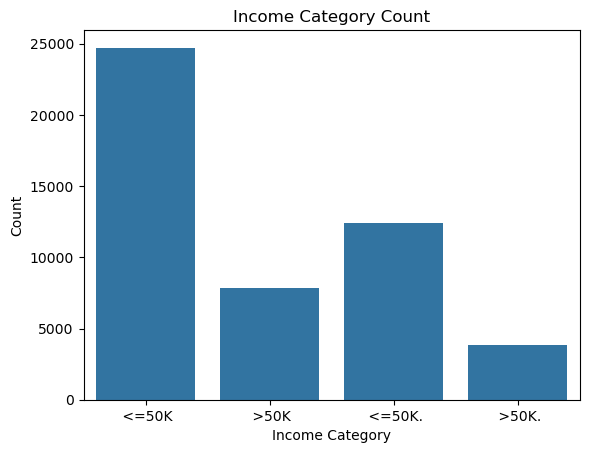

In [11]:
sns.countplot(x='Income', data=df)
plt.title('Income Category Count')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()


In [16]:
df = df.replace('?', np.nan)
df.isnull().sum()


Age              0
Emp_type         0
Education        0
Education_num    0
Marital          0
Occupation       0
Relationship     0
Race             0
Sex              0
Capital_gain     0
Capital_loss     0
weekly_hours     0
Country          0
Income           0
dtype: int64

In [17]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)


In [18]:
categorical_cols = df.select_dtypes(include='object').columns

In [19]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [20]:
X = df.drop('Income', axis=1)
y = df['Income']


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [23]:
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [24]:
y_pred_logreg = model_logreg.predict(X_test)


In [24]:



print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))


print(classification_report(y_test, y_pred_logreg, zero_division=1))



Logistic Regression Accuracy: 0.5483518733365181
              precision    recall  f1-score   support

           0       0.56      0.94      0.70      7380
           1       1.00      0.00      0.00      3729
           2       0.48      0.45      0.47      2382
           3       1.00      0.00      0.00      1162

    accuracy                           0.55     14653
   macro avg       0.76      0.35      0.29     14653
weighted avg       0.69      0.55      0.43     14653



In [25]:
kf = KFold(n_splits=10)
logreg_cv_scores = cross_val_score(model_logreg, X_scaled, y, cv=kf)

print("Logistic Regression CV Accuracy:", logreg_cv_scores.mean())


Logistic Regression CV Accuracy: 0.5500481047717486


In [26]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [27]:
y_pred_knn = model_knn.predict(X_test)


In [28]:

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


print(classification_report(y_test, y_pred_knn, zero_division=1))


KNN Accuracy: 0.49996587729475195
              precision    recall  f1-score   support

           0       0.57      0.75      0.65      7380
           1       0.29      0.19      0.23      3729
           2       0.47      0.42      0.44      2382
           3       0.24      0.10      0.14      1162

    accuracy                           0.50     14653
   macro avg       0.39      0.36      0.36     14653
weighted avg       0.46      0.50      0.47     14653



In [29]:
knn_cv_scores = cross_val_score(model_knn, X_scaled, y, cv=kf)

print("KNN CV Accuracy:", knn_cv_scores.mean())


KNN CV Accuracy: 0.4478453069241196


In [29]:

new_data = pd.DataFrame({
    'Age': [32, 45],
    'Emp_type': [2, 4],
    'Education': [11, 13],
    'Education_num': [11, 13],
    'Marital': [1, 0],
    'Occupation': [4, 8],
    'Relationship': [0, 1],
    'Race': [4, 2],
    'Sex': [1, 0],
    'Capital_gain': [0, 5000],
    'Capital_loss': [0, 0],
    'weekly_hours': [40, 50],  
    'Country': [38, 39]
})


new_data_scaled = scaler.transform(new_data)


new_predictions = model_logreg.predict(new_data_scaled)


print("Predicted Income Categories for New Records:", new_predictions)


Predicted Income Categories for New Records: [0 2]
